In [1]:
##################################################################################################################
##################################################################################################################
###############################################ngrams representation###############################################
##################################################################################################################
##################################################################################################################

In [2]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import gensim
from gensim import models
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer

import tqdm
from tqdm import tqdm

import nltk

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models

In [4]:
df = pd.read_csv ('sample.csv')
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Full Text
0,@hamcore_ First the boss metal zone schematics...
1,@sippygup its in the vaccine and 5g makes it m...
2,Him and all the others that do Not like and ha...
3,@TimRunsHisMouth Him and all the others that d...
4,@NYGovCuomo 99.97% survival rate no vaccine fo...
...,...
9953,Waiting for the train and I hear two mfs say �...
9954,I played my radical left avant garde music and...
9955,You are such a fag @MayorKeller And what the F...
9956,.@seanspicer hahahaha Trump's accomplishments?...


In [5]:
docs = np.array(df['Full Text'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
for i in range(0,9958):
    df.iloc[i, 0] = " ".join(filter(lambda x:x[0]!='#', df.iloc[i, 0].split()))
    df.iloc[i, 0] = " ".join(filter(lambda x:x[0]!='@', df.iloc[i, 0].split()))
df  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Full Text
0,First the boss metal zone schematics as 5g in ...
1,its in the vaccine and 5g makes it more powerf...
2,Him and all the others that do Not like and ha...
3,Him and all the others that do Not like and ha...
4,99.97% survival rate no vaccine for me
...,...
9953,Waiting for the train and I hear two mfs say �...
9954,I played my radical left avant garde music and...
9955,You are such a fag And what the Fuck is that q...
9956,.@seanspicer hahahaha Trump's accomplishments?...


In [7]:
docs = np.array(df['Full Text'])
docs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['First the boss metal zone schematics as 5g in a vaccine now hitler got stuff right??? Cmon man it�s only 10:42am',
       'its in the vaccine and 5g makes it more powerful watch out',
       "Him and all the others that do Not like and hate DonaldTrump is just because They are part of the satanic Deep State illuminati and serves different??God, the same God that gave him the power to poisoning our food and water. That's Monsanto plus he is behind the Vaccines?? withVP",
       ...,
       'You are such a fag And what the Fuck is that que que logo all about? What a stupid waste of time and money you are. No mask No distancing No testing No vaccine',
       ".@seanspicer hahahaha Trump's accomplishments?? The vaccine? That international companies have been working on since before Trump acknowledged there was a pandemic? The economy? It rallied when Biden won and now when the transition started. Trump killed farmers.",
       "100%. It was about the election, not the virus. Now it

In [8]:
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')
# get a set of stopwords
stopwords = set(nltk.corpus.stopwords.words("english"))

from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdullah.wahbeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdullah.wahbeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
def docs_preprocessor(docs):
    # Tokenize corpus
    tokenizer = nltk.tokenize.RegexpTokenizer(r"[a-z]+")

    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.     
        

    # Only keep tokens that contains alphanumeric characters, without symbols.
    docs = [[token for token in doc if token.isalnum()] for doc in docs]
    
    # Remove stopwords.
    docs = [[token for token in doc if token not in stopwords] for doc in docs]

    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 1] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
docs = docs_preprocessor(docs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
processed_docs = []
for i in range(len(docs)):
    processed_docs.append(' '.join(docs[i]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
from nltk import ngrams
ngram_list = []
for i in range(len(processed_docs)):
    doc = processed_docs[i]
    bigram = ngrams(doc.split(' '), n=2)
    trigram = ngrams(doc.split(' '), n=3)
    ngram_docs = []
    for x in bigram:
        ngram_docs.append(' '.join(x))
    for y in trigram:
        ngram_docs.append(' '.join(y))
    ngram_list.append(ngram_docs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
docs = ngram_list

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
docs_dict = Dictionary(docs)
print('Number of unique words in initital documents:', len(docs_dict))

# Filter out words that occur less than 10 documents, or more than 40% of the documents.
docs_dict.filter_extremes(no_below=2, no_above=0.80)
print('Number of unique words after removing rare and common words:', len(docs_dict))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique words in initital documents: 185404
Number of unique words after removing rare and common words: 16009


In [15]:
#bag of words representation
corpus = [docs_dict.doc2bow(doc) for doc in docs]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
print('Number of unique tokens: %d' % len(docs_dict))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 16009
Number of documents: 9958


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
import csv
my_dict = {'App 1': 'App id1', 'App 2': 'App id2', 'App 3': 'App id3'}
with open('dict.csv', 'w') as f:
    fieldnames = ['Key', 'Feature']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    data = [dict(zip(fieldnames, [k, v])) for k, v in docs_dict.items()]
    writer.writerows(data)




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
from gensim.models import LdaModel
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.callbacks import PerplexityMetric, ConvergenceMetric, CoherenceMetric
import logging
import os

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# logging.basicConfig(filename='model_callbacks.log',
#                     format="%(asctime)s:%(levelname)s:%(message)s",
#                     level=logging.NOTSET)

logging.basicConfig(filename='model_callbacks.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.NOTSET)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Set up the callbacks loggers
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
convergence_logger = ConvergenceMetric(logger='shell')
coherence_cv_logger = CoherenceMetric(corpus=corpus, logger='shell', coherence = 'c_v', texts = docs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# List of the different iterations to try
iterations = [50,100,200,500]

# The number of passes to use - could change depending on requirements
passes = 50

# The number of topics
num_topics = 50

# Don't evaluate model perplexity, takes too much time.
eval_every = 10 

# size of the doc looked at every pass
chunksize = 10000 

# Make an index to word dictionary.
#temp = docs_dict[0]  # This is only to "load" the dictionary.
#id2word = docs_dict.id2token    #I am having problem with this when used for id2word parameter 

for iteration in iterations:
   
    # Add text to logger to indicate new model
    logging.debug(f'Start of model: {iteration} iterations')

    # Create model - note callbacks argument uses list of created callback loggers
    %time model = LdaModel(corpus=corpus, id2word=docs_dict, chunksize=chunksize, alpha='auto', eta='auto',\
                           iterations=iteration, num_topics=num_topics, passes=passes, eval_every=eval_every,\
                           callbacks=[convergence_logger, perplexity_logger, coherence_cv_logger])

    # Add text to logger to indicate end of this model
    logging.debug(f'End of model: {iteration} iterations')

    # Save models so they aren't lost
    if not os.path.exists(f"lda_{iteration}i50p/"):
        os.makedirs(f"lda_{iteration}i50p/")

    model.save(f"lda_{iteration}i50p/lda_{iteration}i50p.model")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 22min 49s
Wall time: 41min 11s
Wall time: 1h 14s
Wall time: 1h 20min 12s


In [21]:
# Function to go through the saved logging file and pull out the number of documents converged at each pass.
# Function to detect relevant numbers in log
def find_doc_convergence(topic_num, iteration, log):
    # Regex to bookend log for iteration - choose last occurrence
    end_slice = re.compile(f"End of model: {iteration} iterations")
    print(end_slice)
    end_matches = [end_slice.findall(l) for l in open(log)]
    iteration_end = [i for i, x in enumerate(end_matches) if x]
    iteration_end = iteration_end[-1]
    start_slice = re.compile(f"Start of model: {iteration} iterations")
    start_matches = [start_slice.findall(l) for l in open(log)]
    start_options = [i for i, x in enumerate(start_matches) if x]
    start_options = [item for item in start_options if item < iteration_end]
    iteration_start = max(start_options)
    iteration_bookends = [iteration_start, iteration_end]
    # Regex to find documents converged figures
    p = re.compile(":(\\d+)\\/\\d")
    matches = [p.findall(l) for l in open(log)]
    matches = matches[iteration_bookends[0]:iteration_bookends[1]]
    matches = [m for m in matches if len(m) > 0]
    # Unlist internal lists and turn into numbers
    matches = [m for sublist in matches for m in sublist]
    matches = [float(m) for m in matches]
    return(matches)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
"""
Then you can use the model.metrics to get the callbacks metrics for each model, and
the function above to get the metrics from the log. This creates a dataframe of all 
the metrics across the models.
"""
iterations = [50,100,200,500]

all_metrics = pd.DataFrame()

for iteration in tqdm(iterations):
    model = models.ldamodel.LdaModel.load(f"lda_{iteration}i50p/lda_{iteration}i50p.model")
    df = pd.DataFrame.from_dict(model.metrics)

    df['docs_converged'] = find_doc_convergence(5, iteration, "model_callbacks.log")
    df['iterations'] = iteration
    df['topics'] = 5

    df = df.reset_index().rename(columns={'index': 'pass_num'})

    all_metrics = pd.concat([all_metrics, df])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
 25%|██▌       | 1/4 [00:05<00:16,  5.40s/it]

re.compile('End of model: 50 iterations')


 50%|█████     | 2/4 [00:10<00:10,  5.34s/it]

re.compile('End of model: 100 iterations')


 75%|███████▌  | 3/4 [00:20<00:07,  7.42s/it]

re.compile('End of model: 200 iterations')


100%|██████████| 4/4 [00:33<00:00,  8.33s/it]

re.compile('End of model: 500 iterations')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


50
100
200
500
50
100
200
500
50
100
200
500
50
100
200
500


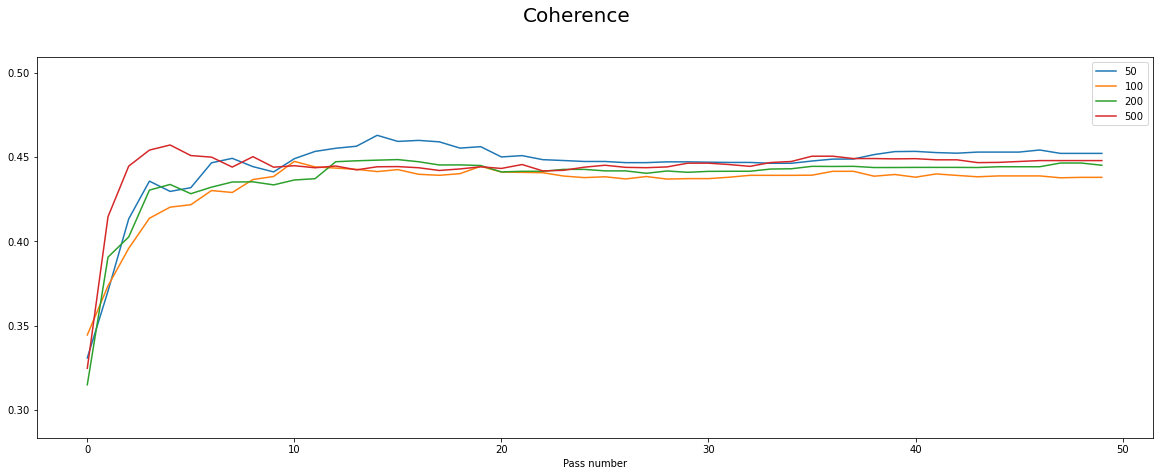

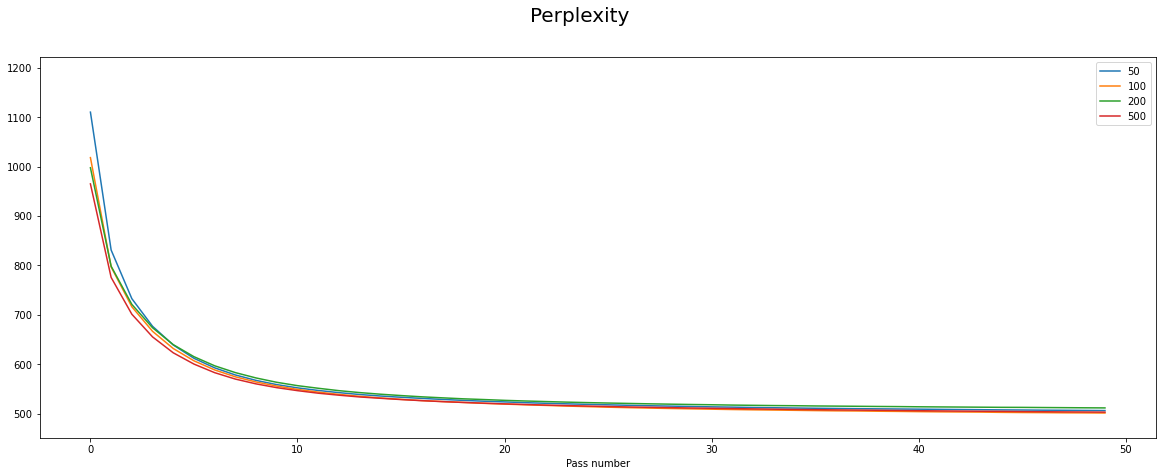

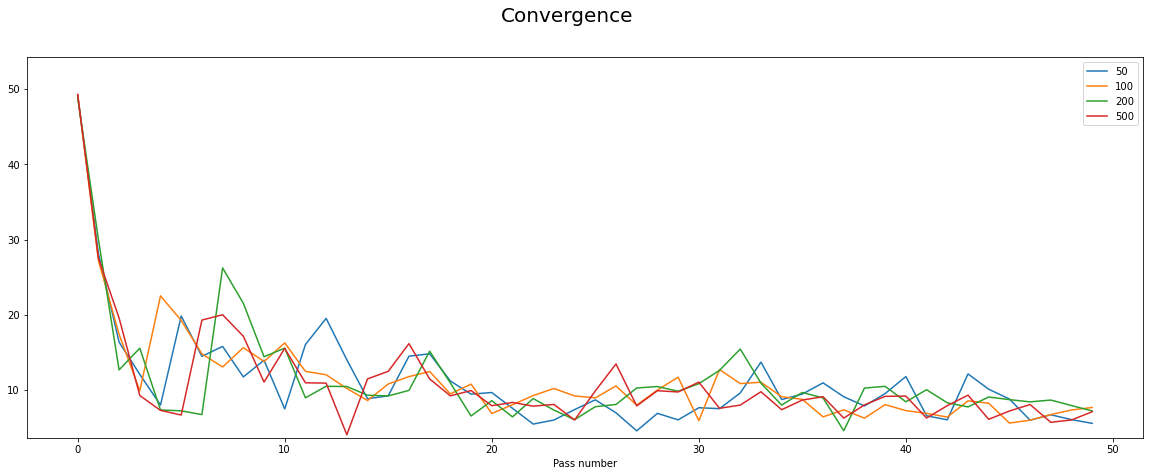

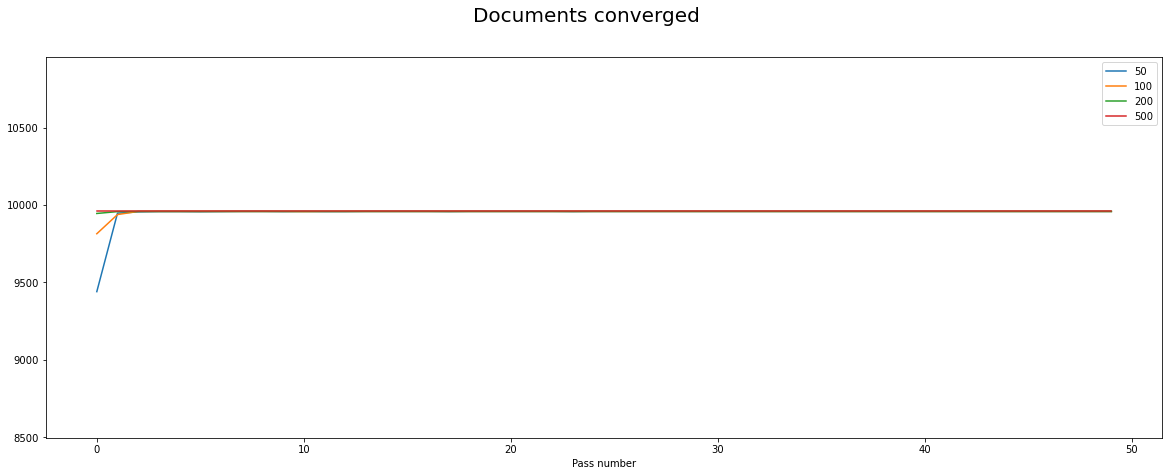

In [23]:
# Finally, you can visualise the results using something like this:

for metric in ['Coherence', 'Perplexity', 'Convergence', 'docs_converged']:
   
    fig, axs = plt.subplots(1, 1, figsize=(20, 7))

    # Each plot to show results for all models with the same topic number
    for i, topic_number in enumerate([5]):
        filtered_topics = all_metrics[all_metrics['topics'] == topic_number]
        for label, df in filtered_topics.groupby(['iterations']):
            print(label)
            df.plot(x='pass_num', y=metric, ax=axs, label=label)

        axs.set_xlabel(f"Pass number")
        axs.legend()
        axs.set_ylim([all_metrics[metric].min() * 0.9, all_metrics[metric].max() * 1.1])
       
    if metric == 'docs_converged':
        fig.suptitle('Documents converged', fontsize=20)
    else:
        fig.suptitle(metric, fontsize=20)

# Logging liklihood

In [ ]:
logging.basicConfig(filename='gensim.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

In [ ]:
# Set training parameters.
num_topics = 50
chunksize = 9958 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 100
eval_every = 10  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = docs_dict[0]  # This is only to "load" the dictionary.
id2word = docs_dict.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

In [ ]:
import re
import matplotlib.pyplot as plt
p = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")
print(p)
matches = [p.findall(l) for l in open('gensim.log')]
matches = [m for m in matches if len(m) > 0]
tuples = [t[0] for t in matches]
perplexity = [float(t[1]) for t in tuples]
liklihood = [float(t[0]) for t in tuples]
iter = list(range(0,len(tuples)*10,10))
plt.plot(iter,liklihood,c="black")
plt.ylabel("log liklihood")
plt.xlabel("iteration")
plt.title("Topic Model Convergence")
plt.grid()
plt

# plt.grid().savefig("convergence_liklihood.pdf")
# plt.close()